## Statistical and Machine Learning, Fall 2024

### Week 3: Python Programming for Machine Learning, Part 2: Tensor, Gradient, and Automatic Differentiation		

### Instructor: Farhad Pourkamali 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388Online/blob/main/Week3.ipynb)



### Tensors
<hr style="border:2px solid gray">

* Understanding and implementing machine learning methods require mathematical concepts, such as 
    * tensors
    * tensor operations 
    * differentiation: finding the derivative, or rate of change, of a function

* Tensors are a generalization of vectors and matrices to an arbitrary number of dimensions

    * In the context of tensors, a dimension is often called an "axis"
    * The number of axes of a tensor is called its "rank" 
        + Scalars: rank-0 tensors 
        + Vectors: rank-1 tensors 
        + Matrices: rank-2 tensors 
        + Higher-rank tensors are very useful for representing complex data sets
        
 <img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/tensor.png?raw=true" width=380>
        
* Four things you need to know about tensors
    * Type $\longrightarrow$ type
        + The type() function is used to determine the type of an object 
    * Number of axes or rank $\longrightarrow$ ndim
    * Shape $\longrightarrow$ shape 
    * Data type $\longrightarrow$ dtype

* NumPy
    + Support for multi-dimensional arrays known as "ndarray" (vectors, matrices, etc.)
    + A large collection of mathematical functions to operate on these arrays

In [1]:
import numpy as np 

x = np.array([1, 2, 4])

x

array([1, 2, 4])

In [2]:
print(type(x))

<class 'numpy.ndarray'>


In [3]:
x.ndim

1

In [4]:
x.shape

(3,)

In [5]:
x.dtype

dtype('int64')

In [6]:
y = np.array([[1, 2, 4],
              [3, 6, 5],
              [2, 1, 3]])

y

array([[1, 2, 4],
       [3, 6, 5],
       [2, 1, 3]])

In [7]:
y[0]

array([1, 2, 4])

In [8]:
y[:,0]

array([1, 3, 2])

In [9]:
print(y.ndim, y.shape, y.dtype)

2 (3, 3) int64


In [10]:
# Why is indexing axes important?
y.sum(axis=0)

array([ 6,  9, 12])

In [11]:
y.sum(axis=1)

array([ 7, 14,  6])

In [12]:
# Do you notice a difference? 

y.sum(axis=1, keepdims=True)


array([[ 7],
       [14],
       [ 6]])

In [13]:
y.sum(axis=1, keepdims=True).shape

(3, 1)

In [14]:
# tensor slicing

y[1:,1:]

array([[6, 5],
       [1, 3]])

In [15]:
# negative indices indicate positions relative to the end of the current axis

y[-2:,-2:]

array([[6, 5],
       [1, 3]])

### Tensor operations 
<hr style="border:2px solid gray">

* When dealing with NumPy arrays, linear algebra operations, such as matrix-vector multiplication, dot products, and matrix factorizations, are available as well-optimized built-in NumPy functions

    * One of the reasons for NumPy's speed is its utilization of Basic Linear Algebra Subprograms (BLAS) 
    
    * These routines are typically implemented in low-level languages like Fortran or C
    
    * Highly optimized to take advantage of the underlying hardware's capabilities, such as vectorization and parallelism

In [16]:
import numpy as np 

x = np.random.random((1000000,))
y = np.random.random((1000000,))

# time the difference between NumPy's np.dot and our implementation 

import time 

t0 = time.time()

z = np.dot(x, y) # inner product of vectors

t_numpy = time.time() - t0

print("NumPy takes {:0.4f} s".format(t_numpy))

NumPy takes 0.0008 s


In [17]:
def our_dot_product(x, y):
    '''
    Accepts two 1D arrays and returns the inner product
    test
    teste2 
    '''
    # used as a debugging aid to check whether a given condition is True
    assert len(x.shape) == 1 
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    
    for i in range(x.shape[0]):
        z += x[i] * y[i]
        
    return z 

t0 = time.time()

z_our = our_dot_product(x, y)

t_our = time.time() - t0

print("Our implementation takes {:0.4f} s, which is {:0.4f} slower".format(t_our, t_our/t_numpy))

print("Difference: " + str(z_our - z))


Our implementation takes 0.1579 s, which is 187.7129 slower
Difference: 8.731149137020111e-11


In [18]:
# Next, we use our implementation of inner product to perform matrix-matrix multiplication 

X = np.array([[1.,2,3],
              [4,5,6]])

Y = np.array([[2., 3],
              [1,2],
              [4,2]])

print(X, '\n\n', Y)

[[1. 2. 3.]
 [4. 5. 6.]] 

 [[2. 3.]
 [1. 2.]
 [4. 2.]]


In [19]:
def our_matrix_product(X, Y):
    assert len(X.shape) == 2
    assert len(Y.shape) == 2
    assert X.shape[1] == Y.shape[0]
    
    Z = np.zeros((X.shape[0], Y.shape[1]))
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[1]):
            row_X = X[i,:]
            column_Y = Y[:,j]
            Z[i, j] = our_dot_product(row_X, column_Y)
            
    return Z 

Z_our = our_matrix_product(X, Y)

Z_numpy = np.dot(X, Y)

Z_numpy2 = np.matmul(X, Y) # Another way of performing matrix-matrix multiplication  

print(Z_our, '\n\n', Z_numpy, '\n\n', Z_numpy2)


[[16. 13.]
 [37. 34.]] 

 [[16. 13.]
 [37. 34.]] 

 [[16. 13.]
 [37. 34.]]


### Higher-rank tensors 
<hr style="border:2px solid gray">

* The following code cell utilizes a dataset available through TensorFlow/Keras, a prominent deep learning library. This serves as an exercise in the installation of external libraries not included within the Anaconda distribution. While the installation process is generally straightforward for Linux and Windows users (https://www.tensorflow.org/), individuals utilizing a MacBook with Apple Silicon may find the following video tutorial helpful in navigating the installation process (https://youtu.be/xEBrzVYsuBc).




In [20]:
from tensorflow.keras.datasets import mnist 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
train_images[0].shape

(28, 28)

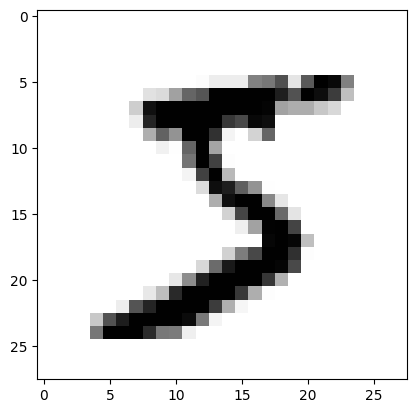

In [25]:
import matplotlib.pyplot as plt 

plt.imshow(train_images[0], cmap='binary')
plt.show()

In [26]:
train_images_rank2 = train_images.reshape((60000, 28 * 28))

train_images_rank2.shape

(60000, 784)

In [27]:
# Find the n-th batch of 128 data points? 

n = 0

train_images_rank2[128*n : 128*(n+1)].shape

(128, 784)

### Automatic differentiation
<hr style="border:2px solid gray">

* Gradients are a generalization of derivatives to functions that take tensors (multidimensional arrays) as inputs

* Example: Consider $\mathbf{x}=\begin{bmatrix}x_1 \\ x_2\end{bmatrix}$ and $f(\mathbf{x})=\|\mathbf{x}\|_2^2=x_1^2+x_2^2$
    * Gradient 
    $$\nabla f=\begin{bmatrix}\frac{\partial f}{\partial x_1}\\ \frac{\partial f}{\partial x_2}\end{bmatrix}=\begin{bmatrix}2x_1 \\2x_2\end{bmatrix}=2\mathbf{x}$$
    
* The idea behind automatic differentiation is to allow the computation of gradients without manually specifying the derivative formulas

* `tf.GradientTape` is TensorFlow's primary tool for automatic differentiation (autodiff). 

* "Tape" Analogy: Think of it like a recording tape. It records the forward pass of your computations. When you call `tape.gradient()`, it essentially rewinds the tape and calculates the gradients using the chain rule.

In [28]:
import tensorflow as tf

x = tf.Variable([1.0, 4.0])

with tf.GradientTape() as tape: # TensorFlow API for automatic differentiation
    y = x**2
    
# Compute gradients
dy_dx = tape.gradient(y, x)

print(dy_dx)

tf.Tensor([2. 8.], shape=(2,), dtype=float32)


#### Consider a simplified linear regression model as follows 

 <img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/simplelin.png?raw=true" width=450>


* Our goal is to compute the gradient of the loss function with respect to the model parameters.



In [29]:
w = tf.Variable(tf.random.uniform((2, 1)))

x = tf.Variable(tf.random.uniform((2, 1)))

y = tf.matmul(tf.transpose(x), w)

print("w: " + str(w) )

print("x: " + str(x) )

print("y: " + str(y) )


w: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.27182555],
       [0.01838541]], dtype=float32)>
x: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.31179297],
       [0.8263413 ]], dtype=float32)>
y: tf.Tensor([[0.09994592]], shape=(1, 1), dtype=float32)


In [30]:
with tf.GradientTape() as tape:
    y = tf.matmul(tf.transpose(x), w)
    loss = y**2

dl_dw = tape.gradient(loss, w)

print(dl_dw)

tf.Tensor(
[[0.06232487]
 [0.16517888]], shape=(2, 1), dtype=float32)


### Further reading
<hr style="border:2px solid gray">

* Introduction to gradients and automatic differentiation: https://www.tensorflow.org/guide/autodiff